In [1]:
import pandas as pd

In [2]:
df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-12.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet')

In [3]:
df1.shape, df2.shape

((1461898, 19), (1369769, 19))

In [4]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1,21.5,3.0,0.5,2.50,6.12,0.3,33.92,2.5,NaN
1,1,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1,8.0,3.0,0.5,2.95,0.00,0.3,14.75,2.5,NaN
2,2,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1,52.0,0.0,0.5,2.50,6.12,0.3,63.92,2.5,NaN
3,2,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1,14.0,0.5,0.5,1.00,0.00,0.3,18.80,2.5,NaN
4,2,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80,0.0,NaN


In [5]:
df1['duration'] = df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime

In [6]:
df1['duration'].iloc[0]

Timedelta('0 days 00:10:59')

In [7]:
df1['duration']

0         0 days 00:10:59
1         0 days 00:08:26
2         0 days 00:26:55
3         0 days 00:10:54
4         0 days 00:07:29
                ...      
1461893   0 days 00:16:47
1461894   0 days 00:08:56
1461895   0 days 00:39:20
1461896   0 days 00:12:53
1461897   0 days 00:12:03
Name: duration, Length: 1461898, dtype: timedelta64[ns]

In [8]:
df1['duration'].sort_values()

980055    -10 days +11:21:58
1169444    -1 days +23:45:56
1455862    -1 days +23:59:01
1383150    -1 days +23:59:01
1409262    -1 days +23:59:03
                 ...        
500237       0 days 23:59:39
500236       0 days 23:59:39
795899       0 days 23:59:42
1122739      1 days 19:02:52
1106896      1 days 21:13:40
Name: duration, Length: 1461898, dtype: timedelta64[ns]

In [9]:
ts = df1['duration'].iloc[0]

In [10]:
ts

Timedelta('0 days 00:10:59')

In [11]:
ts.total_seconds()

659.0

In [12]:
df1['duration in min'] = df1['duration'].apply(lambda x: x.total_seconds()/60)

In [13]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration in min
0,1,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1,...,3.0,0.5,2.50,6.12,0.3,33.92,2.5,NaN,0 days 00:10:59,10.983333
1,1,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1,...,3.0,0.5,2.95,0.00,0.3,14.75,2.5,NaN,0 days 00:08:26,8.433333
2,2,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1,...,0.0,0.5,2.50,6.12,0.3,63.92,2.5,NaN,0 days 00:26:55,26.916667
3,2,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1,...,0.5,0.5,1.00,0.00,0.3,18.80,2.5,NaN,0 days 00:10:54,10.900000
4,2,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2,...,0.5,0.5,0.00,0.00,0.3,9.80,0.0,NaN,0 days 00:07:29,7.483333


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration in min', ylabel='Density'>

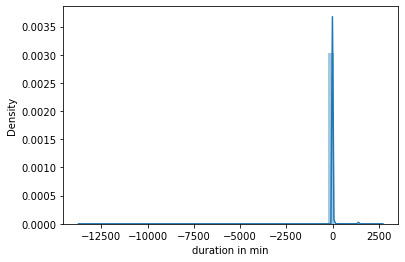

In [15]:
sns.distplot(df1['duration in min'])

In [16]:
df1['duration in min'].describe(percentiles = [0.95,0.98,0.99])

count    1.461898e+06
mean     1.504703e+01
std      6.170609e+01
min     -1.371803e+04
50%      9.766667e+00
95%      3.173333e+01
98%      4.400000e+01
99%      5.715000e+01
max      2.713667e+03
Name: duration in min, dtype: float64

In [17]:
df = df1[(df1['duration in min']>=1)& (df1['duration in min']<=60)].drop(columns = ['duration'], axis = 1)

In [18]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration in min
0,1,2020-12-01 00:07:13,2020-12-01 00:18:12,1.0,7.60,1.0,N,138,263,1,21.5,3.0,0.5,2.50,6.12,0.3,33.92,2.5,NaN,10.983333
1,1,2020-12-01 00:41:19,2020-12-01 00:49:45,1.0,1.60,1.0,N,140,263,1,8.0,3.0,0.5,2.95,0.00,0.3,14.75,2.5,NaN,8.433333
2,2,2020-12-01 00:33:40,2020-12-01 01:00:35,1.0,16.74,2.0,N,132,164,1,52.0,0.0,0.5,2.50,6.12,0.3,63.92,2.5,NaN,26.916667
3,2,2020-12-01 00:02:15,2020-12-01 00:13:09,1.0,4.16,1.0,N,238,48,1,14.0,0.5,0.5,1.00,0.00,0.3,18.80,2.5,NaN,10.900000
4,2,2020-12-01 00:37:42,2020-12-01 00:45:11,1.0,2.22,1.0,N,238,41,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80,0.0,NaN,7.483333


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration in min', ylabel='Density'>

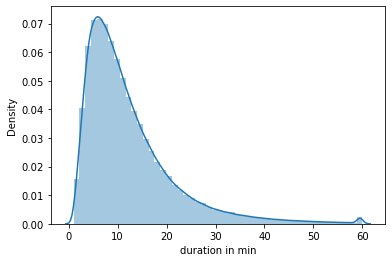

In [19]:
sns.distplot(df['duration in min'])

In [21]:
df["PU_DO"] = df['PULocationID'].astype(str) +'_'+df['DOLocationID'].astype(str)

In [22]:
cat = ['PU_DO']
num = ['trip_distance']

In [23]:
df[cat].dtypes

PU_DO    object
dtype: object

In [24]:
df[cat] = df[cat].astype(str)

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
dv = DictVectorizer()

In [27]:
df[cat+num]

,PU_DO,trip_distance
0,138_263,7.60
1,140_263,1.60
2,132_164,16.74
3,238_48,4.16
4,238_41,2.22
...,...,...
1461893,143_20,9.22
1461894,4_262,4.79
1461895,210_78,28.00
1461896,148_129,7.08


In [28]:
df[cat].dtypes

PU_DO    object
dtype: object

In [29]:
df_train = df[cat+num].to_dict(orient = 'records')

In [30]:
df_train[:10]

[{'PU_DO': '138_263', 'trip_distance': 7.6},
 {'PU_DO': '140_263', 'trip_distance': 1.6},
 {'PU_DO': '132_164', 'trip_distance': 16.74},
 {'PU_DO': '238_48', 'trip_distance': 4.16},
 {'PU_DO': '238_41', 'trip_distance': 2.22},
 {'PU_DO': '138_137', 'trip_distance': 8.4},
 {'PU_DO': '132_191', 'trip_distance': 6.44},
 {'PU_DO': '234_137', 'trip_distance': 0.99},
 {'PU_DO': '261_7', 'trip_distance': 11.81},
 {'PU_DO': '237_107', 'trip_distance': 2.7}]

In [31]:
X_train = dv.fit_transform(df_train)

In [32]:
X_train

<1431997x27059 sparse matrix of type '<class 'numpy.float64'>'
	with 2863994 stored elements in Compressed Sparse Row format>

In [33]:
y_train = df['duration in min'].values

In [34]:
y_train

array([10.98333333,  8.43333333, 26.91666667, ..., 39.33333333,
       12.88333333, 12.05      ])

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


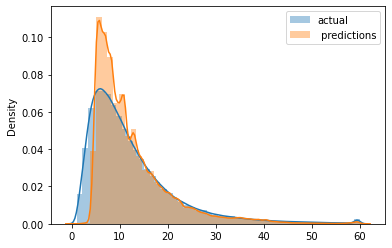

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

sns.distplot(y_train, label = 'actual')
sns.distplot(y_pred, label = ' predictions')
plt.legend()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_train, y_pred, squared= False)

4.594331018241661

In [38]:
def preprocess(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration in min'] = df['duration'].apply(lambda x: x.total_seconds()/60)
    df = df[(df['duration in min']>=1)& (df['duration in min']<=60)].drop(columns = ['duration'], axis = 1)
    df["PU_DO"] = df['PULocationID'].astype(str) +'_' +df['DOLocationID'].astype(str)
    df['PU_DO'] = df['PU_DO'].astype(str)
    
    return df

In [39]:
df_train = preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-12.parquet')

In [40]:
df_val = preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet')

In [41]:
df_train.shape, df_val.shape

((1431997, 21), (1343254, 21))

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


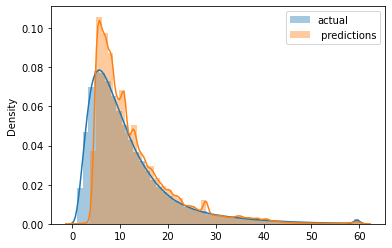

In [42]:
train_dict = df_train[cat+num].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['duration in min'].values
val_dict = df_val[cat+num].to_dict(orient = 'records')
X_val = dv.transform(val_dict)
y_val = df_val['duration in min'].values

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

sns.distplot(y_val, label = 'actual')
sns.distplot(y_pred, label = ' predictions')
plt.legend()

In [43]:
mean_squared_error(y_val, y_pred, squared= False)

4.486412549838758

In [44]:
import pickle

with open('models/lin_reg.bin', 'wb') as model_out:
    pickle.dump((dv, lr), model_out)